# Univariate linear regression coded by hand
It only requires a single line of code to run linear regression in languages like R or Python, which makes it all too easy to run an analysis without really understanding it. During my university training, I learned how to perform linear regression with only a pencil and paper. This was excruciatingly slow and required an extremely simple data set, but the point of the exercise was to develop a better understanding of how the algorithm functioned. I've been doing a refresher course on some of the basics over the past few weeks with a fantastic machine learning course through Coursera. We just finished coding an algorithm for simple univariate regression using only basic mathematical functions in python. It was a fantastic learning experience, and even though I've been regularly performing regression via gradient descent for more than a decade, I have an entirely new appreciation for the method and a much better sense of how to troubleshoot issues (e.g., model non-convergence, feature scaling, learning rate optimization) when they arise. **This code is heavily based on a series of tutorials in the Coursera supervised machine learning module taught by Andrew Ng.**

In [8]:
#Import libraries and test data
import math, copy
import numpy as np
import matplotlib.pyplot as plt

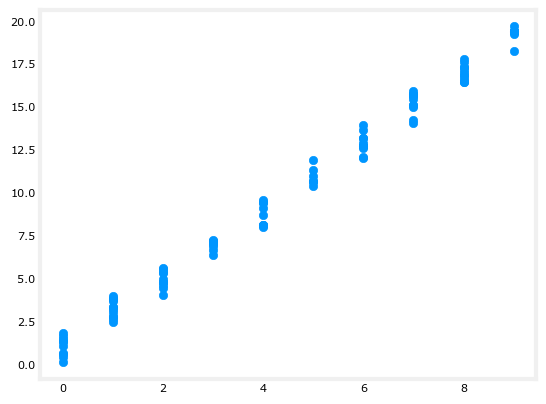

In [53]:
#Create and visualize some training data
x_train = np.random.randint(10, size=(100)) #Random float numbers from [0,100)
y_train_noise = np.random.rand(100) #A small amount of noise to add to y
y_train = 2*(x_train + y_train_noise) # Y = 2x + noise
plt.scatter(x_train,y_train)

In [9]:
#Define a cost function
def compute_cost(x, y, w, b):
   
    m = x.shape[0] #Get number of observations
    cost = 0 #Initialize starting value at zero
    
    for i in range(m):
        f_wb = w * x[i] + b #This calculates the target value (model output)
        cost = cost + (f_wb - y[i])**2 #Squared difference between predicted and observed target
    total_cost = 1 / (2 * m) * cost #Cost divided by twice the sample size (twice by convention - doesn't affect output)

    return total_cost

In [10]:
#Define a function to compute the gradient for dj_dw and dj_db
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0] #Number of observations    
    dj_dw = 0 #Initialize at zero
    dj_db = 0 #Initialize at zero
    
    for i in range(m):  
        f_wb = w * x[i] + b #Compute predicted target value
        dj_dw_i = (f_wb - y[i]) * x[i] #This is the partial derivative of j w.r.t. w
        dj_db_i = f_wb - y[i] # This is the partial derivative of b w.r.t b
        dj_db += dj_db_i #This stores the current value of dj_db
        dj_dw += dj_dw_i #This stores the current value of dj_dw
    dj_dw = dj_dw / m #This is still just part of partial derivative calculation
    dj_db = dj_db / m #This is still just part of partial derivative calculation
        
    return dj_dw, dj_db

In [12]:
#Create a gradient descent algorithm that uses the previously defined cost and gradient functions
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs batch gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = [] #This allows us to track the change in cost over iterations
    p_history = [] #This allows us to track the change in parameter values
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion by setting a max number of iterations
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [32]:
#Run the gradient descent algorithm on training data
#The true value of w=2 and b=0, let's see how we did
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.20e+01  dj_dw: -6.160e+01, dj_db: -1.009e+01   w:  6.160e-01, b: 1.00923e-01
Iteration 1000: Cost 1.90e-01  dj_dw:  1.388e-03, dj_db: -8.553e-03   w:  1.996e+00, b: 6.80604e-01
Iteration 2000: Cost 1.89e-01  dj_dw:  1.315e-04, dj_db: -8.101e-04   w:  1.991e+00, b: 7.13418e-01
Iteration 3000: Cost 1.89e-01  dj_dw:  1.245e-05, dj_db: -7.672e-05   w:  1.991e+00, b: 7.16526e-01
Iteration 4000: Cost 1.89e-01  dj_dw:  1.180e-06, dj_db: -7.266e-06   w:  1.991e+00, b: 7.16820e-01
Iteration 5000: Cost 1.89e-01  dj_dw:  1.117e-07, dj_db: -6.882e-07   w:  1.991e+00, b: 7.16848e-01
Iteration 6000: Cost 1.89e-01  dj_dw:  1.058e-08, dj_db: -6.518e-08   w:  1.991e+00, b: 7.16851e-01
Iteration 7000: Cost 1.89e-01  dj_dw:  1.002e-09, dj_db: -6.173e-09   w:  1.991e+00, b: 7.16851e-01
Iteration 8000: Cost 1.89e-01  dj_dw:  9.491e-11, dj_db: -5.847e-10   w:  1.991e+00, b: 7.16851e-01
Iteration 9000: Cost 1.89e-01  dj_dw:  8.992e-12, dj_db: -5.537e-11   w:  1.991e+00, b: 7.16851e-01


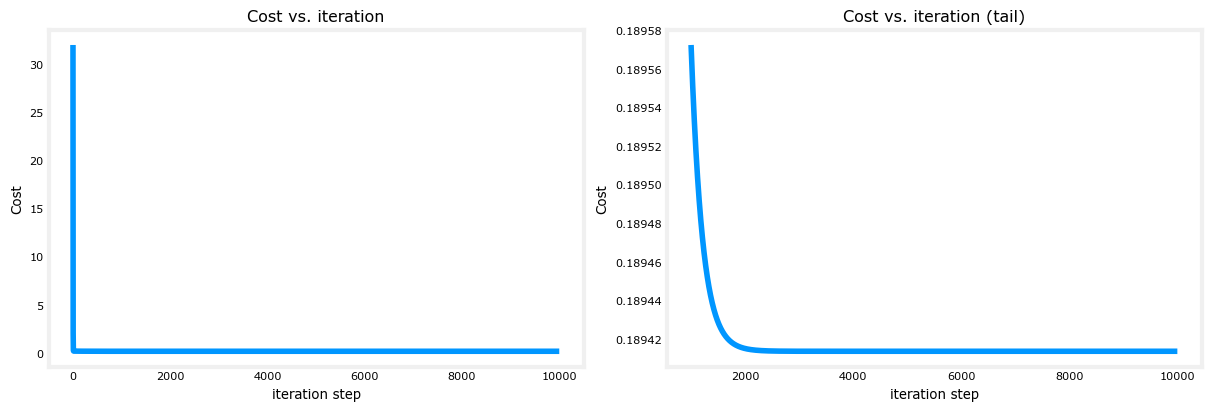

In [33]:
#Plot cost vs iteration to see how well the algorithm is performing
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [50]:
#We can also make a prediction based on model. X=5 should produce something very close to 10 as the prediction
test_data = 5
print(f"The predicted value is off by {((w_final*test_data + b_final)-10)/10*100} percent")


The predicted value is off by 6.696004010796237 percent


# Summary
Using only basic mathematical functions, this script can use gradient descent to find the optimal solution for a univariate regression. There are some important limitations with this code. First, there is no flexibility in the model structure and it cannot accomodate multiple features. Second, there is no threshold set for when to stop the gradient descent algorithm. It just goes until the maximum number of iterations is reached. Third, it's incredibly inefficient code when there are plenty of libraries that can perform this task in a single line. Yet, it's a pretty neat exercise.